4. In a new notebook, load the dataframe object.  Using k-fold cross-validation, apply a linear regression model.  Here, the response variable is the number of times a song has been played based on what we know about the listeners.  Be sure to return the model score on both the training and validation data.
5. Explain your results.  Specifically address, if the assumption of linear response to the input features was reasonable.  You will want to study a plot of the model's residual.  Ideally, the residuals are small in magnitude, and are evenly distributed about the true values.  What are some possible improvements that can be made?
6. Suppose we are instead curious about whether a song will be played by a user based on a demographics.  Apply a logistic regression model and report your results.

# Notebook 2

First, we can import all the package that we are going to use in this section.

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

We can read the pickle file.

In [7]:
pickle_in = open("data.pkl", "rb")
dataprocessed = pickle.load(pickle_in)
print (type(dataprocessed))

<class 'pandas.core.frame.DataFrame'>


Check the data types.

In [8]:
#dataprocessed = dataprocessed.infer_objects() #convert datatypes
print dataprocessed.dtypes

Track Name           object
Number of Played      int64
By Gender           float64
Male Percentage     float64
AVG Age             float64
Played Once         float64
Once Percentage     float64
Played Five         float64
Fifth Percentage    float64
dtype: object


Print the first 5 rows.

In [9]:
dataprocessed.head()

,Track Name,Number of Played,By Gender,Male Percentage,AVG Age,Played Once,Once Percentage,Played Five,Fifth Percentage
0,\nuser_000125\t2007-11-23T04:25:49Z\t03ad1736-...,1,0.0,0.00,20.00,1.0,100.00,0.0,0.00
1,~Kuuhaku~,50,0.0,0.00,20.00,0.0,0.00,1.0,2.00
2,!,2,2.0,100.00,30.00,0.0,0.00,0.0,0.00
3,! (Foreword),38,13.0,34.21,24.53,1.0,2.63,3.0,7.89
4,! (Forward),6,6.0,100.00,25.00,0.0,0.00,1.0,16.67


In [10]:
df = dataprocessed
df

,Track Name,Number of Played,By Gender,Male Percentage,AVG Age,Played Once,Once Percentage,Played Five,Fifth Percentage
0,\nuser_000125\t2007-11-23T04:25:49Z\t03ad1736-...,1,0.0,0.00,20.00,1.0,100.00,0.0,0.00
1,~Kuuhaku~,50,0.0,0.00,20.00,0.0,0.00,1.0,2.00
2,!,2,2.0,100.00,30.00,0.0,0.00,0.0,0.00
3,! (Foreword),38,13.0,34.21,24.53,1.0,2.63,3.0,7.89
4,! (Forward),6,6.0,100.00,25.00,0.0,0.00,1.0,16.67
5,! (Performed By Ghostface Killah And Rhythm Ro...,8,8.0,100.00,23.25,0.0,0.00,1.0,12.50
6,! (The Song Formerly Known As),1,1.0,100.00,28.00,1.0,100.00,0.0,0.00
7,! +,1,1.0,100.00,28.00,1.0,100.00,0.0,0.00
8,! / Sn10.1.Ai 0711,1,1.0,100.00,29.00,1.0,100.00,0.0,0.00
9,! / Sn2.Ai 0853,1,1.0,100.00,29.00,1.0,100.00,0.0,0.00


## The song played by male listener responsed by variable number of played

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Select the variables that we are going to train and test. In here we are going to get the model for male listener based on the total number the song has been played for as response variable.

In [12]:
from sklearn import datasets

xmale = df[['By Gender']]
ymale = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxmale, testxmale, trainymale, testymale) = train_test_split(xmale, ymale, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainymale)))
print("testing data points: {}".format(len(testymale)))

training data points: 341016
testing data points: 113672


Then, we can apply the linear regression to get a model and do the prediction.

In [13]:
from sklearn.linear_model import LinearRegression
# train regression model
regr = LinearRegression(fit_intercept=True)
regr.fit(trainxmale, trainymale)
y_pred = regr.predict(testxmale)

Next we can apply the K-Fold cross vaidation and count the accuracy. In this case, we apply the K-Fold for 10 folds using the value from linear model as the estimator.


In [14]:
#apply K-Fold to our training set
accuracies = cross_val_score(estimator = regr, X = trainxmale, y = trainymale, cv = 10)
accuracies

array([0.88151507, 0.85969412, 0.84279512, 0.87579766, 0.85047046,
       0.86079553, 0.86474064, 0.86608374, 0.87325329, 0.85101629])

The number of accuracy in all of the 10 folds is less than 90. Lets take a look at the mean and the standard deviation to know the overall performance of models to get a much better idea of our model performance.

In [15]:
print "Mean of the accuracy", accuracies.mean()
print "Std Deviation of the accuracy", accuracies.std()

Mean of the accuracy 0.8626161922524924
Std Deviation of the accuracy 0.011607792369454783


We can see that the mean of our models is more than 86 percent of all the 10 models evaluation. The standard deviation to know the variance of the data whether it is low or high. In this case we have a variance of 1.1 percent this means that our model has low variances. Another way tp evaluate ou model is by using the R-Square and mean square error. The more the value approaching 1 the better the model it will be.

In [16]:
# Best possible score is 1.0, lower values are worse.
print ('Training Score:', regr.score(trainxmale, trainymale))
print ('Testing Score:', regr.score(testxmale, testymale))
print ('Training MSE: ', np.mean((regr.predict(trainxmale) - trainymale)**2))
print ('Testing MSE: ', np.mean((regr.predict(testxmale) - testymale)**2))

('Training Score:', 0.862883248512061)
('Testing Score:', 0.8785431837309275)
('Training MSE: ', Number of Played    196.349608
dtype: float64)
('Testing MSE: ', Number of Played    209.691166
dtype: float64)


As we can see above, the value of R-Square is almost 0.90 for both training and testing datasets. When the value of R-Square of a model is more than 0.70, it can be considered a good model.

Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

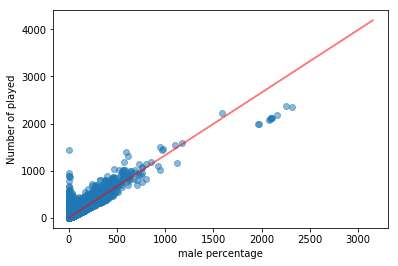

In [17]:
# plot training data, overlay with fit
plt.plot(trainxmale,trainymale,'o', alpha = 0.5)
plt.plot(testxmale, y_pred, 'r', alpha = 0.5)
plt.xlabel('male percentage')
plt.ylabel('Number of played')


Last but not least, we can plot the residual to get a visual plot of the residual linear regression model.

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


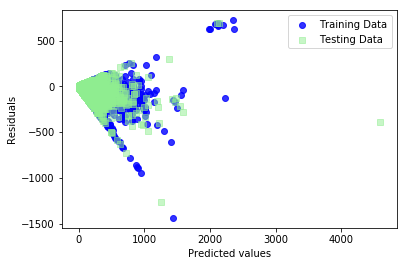

In [18]:
plt.scatter(trainymale, (regr.predict(trainxmale)-trainymale), c='blue', marker='o', label='Training Data', alpha = 0.8)
plt.scatter(testymale, (regr.predict(testxmale)-testymale), c='lightgreen', marker='s', label='Testing Data', alpha = 0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upperleft')
#plt.hlines(y=0, xmin=-10, xmax=60, lw=2, color='red')
plt.show()


### Logistic Regression

The following packages will be used to create a logistic regression model and compute the accuracy.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import classification_report

The following code will create a model of logistic regression and do a prediction for the model.

In [21]:
# assign the logistic regression to the below variable
log_reg1 = LogisticRegression()

# training the model
log_reg1.fit(xmale, ymale)
#testxmale = testxfifth.astype('int')

#predict the model
y_predL1 = log_reg1.predict(testxmale)
y_predL1

Print the confusion matrix, accuracy score, and the classification report.

In [22]:
print("EVALUATION ON TESTING DATA")
print("Confusion Matrix:")
print(confusion_matrix(testymale, y_predL1))
print("Accuracy Score:")
print(accuracy_score(y_predL1, testymale))
print("Classification Report:")
print(classification_report(y_predL1, testymale))

## The average listener age responsed by variable number of played

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for mean age of the listener based on the total number the song has been played for as response variable.

In [54]:
xage = df[['AVG Age']]
yage = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxage, testxage, trainyage, testyage) = train_test_split(xage, yage, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyage)))
print("testing data points: {}".format(len(testyage)))

training data points: 341016
testing data points: 113672


Then, we can apply the linear regression to get a model and do the prediction.

In [55]:
# train regression model
regrage = LinearRegression(fit_intercept=True)
regrage.fit(trainxage, trainyage)
y_predage = regrage.predict(testxage)

Next we can apply the K-Fold cross vaidation and count the accuracy. In this case, we apply the K-Fold for 10 folds using the value from linear model as the estimator.

In [56]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesage = cross_val_score(estimator = regrage, X = trainxage, y = trainyage, cv = 10)
accuraciesage

array([0.00463731, 0.00402015, 0.0051109 , 0.00539617, 0.00489501,
       0.00421902, 0.0046844 , 0.00493267, 0.00431118, 0.00461479])

The number of accuracy in all of the 10 folds is less than 70. Lets take a look at the mean and the standard deviation to know the overall performance of models to get a much better idea of our model performance.

In [57]:
print "Mean of the accuracy", accuraciesage.mean()
print "Std Deviation of the accuracy", accuraciesage.std()

Mean of the accuracy 0.004682158515658896
Std Deviation of the accuracy 0.00039982887321463197


We can see that the mean of our 10 models evaluation is so small. The standard deviation to know the variance of the data whether it is low or high. In this case we have a variance of also very small this means that our model has low variances. Another way to evaluate ou model is by using the R-Square and mean square error. The more the value approaching 1 the better the model it will be.

In [58]:
# Best possible score is 1.0, lower values are worse.
print ('Training Score:', regr.score(trainxage, trainyage))
print ('Testing Score:', regr.score(testxage, testyage))
print ('Training MSE: ', np.mean((regr.predict(trainxage) - trainyage)**2))
print ('Testing MSE: ', np.mean((regr.predict(testxage) - testyage)**2))

('Training Score:', -0.5262721376355459)
('Testing Score:', -0.4300735871120158)
('Training MSE: ', Number of Played    2185.604108
dtype: float64)
('Testing MSE: ', Number of Played    2468.974625
dtype: float64)


As we can see above, the value of R-Square is negative for both training and testing datasets. When the value of R-Square of a model is more than 0.70, it can be considered a good model. Since it is less than 70 percent, then this model is not a good model.

Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

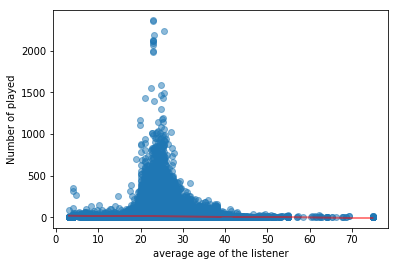

In [14]:
# plot training data, overlay with fit
plt.plot(trainxage,trainyage,'o', alpha = 0.5)
plt.plot(testxage, y_predage, 'r', alpha = 0.5)
plt.xlabel('average age of the listener')
plt.ylabel('Number of played')


Last but not least, we can plot the residual to get a visual plot of the residual linear regression model.

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


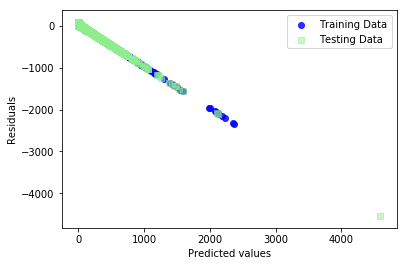

In [79]:
plt.scatter(trainyage, (regr.predict(trainxage)-trainyage), c='blue', marker='o', label='Training Data', alpha = 0.8)
plt.scatter(testyage, (regr.predict(testxage)-testyage), c='lightgreen', marker='s', label='Testing Data', alpha = 0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upperleft')
#plt.hlines(y=0, xmin=-10, xmax=60, lw=2, color='red')
plt.show()

### Logistic Regression

The following code will create a model of logistic regression and do a prediction for the model.

In [24]:
# assign the logistic regression to the below variable
log_reg2 = LogisticRegression()

# training the model
log_reg2.fit(xage, yage)
#testxmale = testxfifth.astype('int')

#predict the model
y_predL2 = log_reg2.predict(testxage)
y_predL2


Print the confusion matrix, accuracy score, and the classification report.

In [23]:
print("EVALUATION ON TESTING DATA")
print("Confusion Matrix:")
print(confusion_matrix(testyage, y_predL2))
print("Accuracy Score:")
print(accuracy_score(y_predL2, testyage))
print("Classification Report:")
print(classification_report(y_predL2, testyage))

## Listener who played a certain song once responsed by variable number of played by number

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing. 

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for the listener who played it once based on the total number the song has been played for as response variable.

In [36]:
xone = df[['Played Once']]
yone = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxone, testxone, trainyone, testyone) = train_test_split(xone, yone, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyone)))
print("testing data points: {}".format(len(testyone)))

training data points: 341016
testing data points: 113672


Then, we can apply the linear regression to get a model and do the prediction.

In [37]:
# train regression model
regrone = LinearRegression(fit_intercept=True)
regrone.fit(trainxone, trainyone)
y_predone = regrone.predict(testxone)

Next we can apply the K-Fold cross vaidation and count the accuracy. In this case, we apply the K-Fold for 10 folds using the value from linear model as the estimator.


In [38]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesone = cross_val_score(estimator = regrone, X = trainxone, y = trainyone, cv = 10)
accuraciesone

array([0.43226816, 0.4412968 , 0.42876746, 0.46858775, 0.42928986,
       0.37095191, 0.42250402, 0.47399969, 0.43526328, 0.42208901])

The number of accuracy in all of the 10 folds is less than 70. Lets take a look at the mean and the standard deviation to know the overall performance of models to get a much better idea of our model performance.

In [40]:
print "Mean of the accuracy", accuraciesone.mean()
print "Std Deviation of the accuracy", accuraciesone.std()

Mean of the accuracy 0.43250179393500154
Std Deviation of the accuracy 0.026702688363886555


We can see that the mean of our models is less than 70 percent of all the 10 models evaluation. The standard deviation to know the variance of the data whether it is low or high. In this case we have a variance of less than 1 percent this means that our model has low variances. Another way tp evaluate our model is by using the R-Square and mean square error. The more the value approaching 1 the better the model it will be.

In [60]:
# Best possible score is 1.0, lower values are worse.
print ('Training Score:', regr.score(trainxone, trainyone))
print ('Testing Score:', regr.score(testxone, testyone))
print ('Training MSE: ', np.mean((regr.predict(trainxone) - trainyone)**2))
print ('Testing MSE: ', np.mean((regr.predict(testxone) - testyone)**2))

('Training Score:', 0.03684169266598181)
('Testing Score:', 0.03409465089252384)
('Training MSE: ', Number of Played    1379.231594
dtype: float64)
('Testing MSE: ', Number of Played    1667.603554
dtype: float64)


As we can see above, the value of R-Square is so small for both training and testing datasets. When the value of R-Square of a model is more than 0.70, it can be considered a good model. Since it is less than 70 percent, then this model is not a good model.

Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

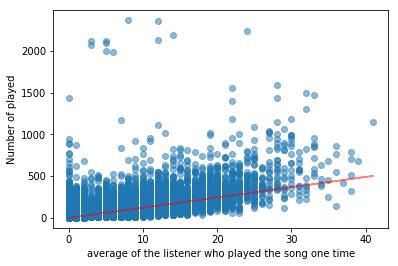

In [18]:
# plot training data, overlay with fit
plt.plot(trainxone,trainyone,'o', alpha = 0.5)
plt.plot(testxone, y_predone, 'r', alpha = 0.5)
plt.xlabel('average of the listener who played the song one time')
plt.ylabel('Number of played')


Last but not least, we can plot the residual to get a visual plot of the residual linear regression model.

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


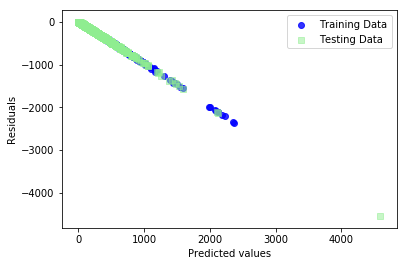

In [78]:
plt.scatter(trainyone, (regr.predict(trainxone)-trainyone), c='blue', marker='o', label='Training Data', alpha = 0.8)
plt.scatter(testyone, (regr.predict(testxone)-testyone), c='lightgreen', marker='s', label='Testing Data', alpha = 0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upperleft')
#plt.hlines(y=0, xmin=-10, xmax=5000, lw=2, color='red')
plt.show()

### Logistic Regression

The following code will create a model of logistic regression and do a prediction for the model.

In [25]:
# assign the logistic regression to the below variable
log_reg3 = LogisticRegression()

# training the model
log_reg3.fit(xone, yone)
#testxmale = testxfifth.astype('int')

#predict the model
y_predL3 = log_reg3.predict(testxone)
y_predL3


Print the confusion matrix, accuracy score, and the classification report.

In [26]:
print("EVALUATION ON TESTING DATA")
print("Confusion Matrix:")
print(confusion_matrix(testyone, y_predL3))
print("Accuracy Score:")
print(accuracy_score(y_predL3, testyone))
print("Classification Report:")
print(classification_report(y_predL3, testyone))

## Listener who played a certain song once responsed by variable number of played by percentage

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for the percentage listener who played it once based on the total number the song has been played for as response variable.

In [41]:
xonce = df[['Once Percentage']]
yonce = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxonce, testxonce, trainyonce, testyonce) = train_test_split(xonce, yonce, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyonce)))
print("testing data points: {}".format(len(testyonce)))

training data points: 341016
testing data points: 113672


Then, we can apply the linear regression to get a model and do the prediction.

In [42]:
# train regression model
regronce = LinearRegression(fit_intercept=True)
regronce.fit(trainxonce, trainyonce)
y_predonce = regronce.predict(testxonce)

Next we can apply the K-Fold cross vaidation and count the accuracy. In this case, we apply the K-Fold for 10 folds using the value from linear model as the estimator.

In [44]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesonce = cross_val_score(estimator = regronce, X = trainxonce, y = trainyonce, cv = 10)
accuraciesonce

array([0.04567496, 0.04047921, 0.05247674, 0.05992295, 0.05075593,
       0.04523814, 0.04723507, 0.05207251, 0.04910156, 0.04743131])

The number of accuracy in all of the 10 folds is less than 70. Lets take a look at the mean and the standard deviation to know the overall performance of models to get a much better idea of our model performance.

In [45]:
print "Mean of the accuracy", accuraciesonce.mean()
print "Std Deviation of the accuracy", accuraciesonce.std()

Mean of the accuracy 0.04903883813977915
Std Deviation of the accuracy 0.0049729713867157025


We can see that the mean of our models is less than 70 percent of all the 10 models evaluation. The standard deviation to know the variance of the data whether it is low or high. In this case we have a variance of lesst than 1 percent this means that our model has low variances. Another way tp evaluate our model is by using the R-Square and mean square error. The more the value approaching 1 the better the model it will be.

In [62]:
# Best possible score is 1.0, lower values are worse.
print ('Training Score:', regr.score(trainxonce, trainyonce))
print ('Testing Score:', regr.score(testxonce, testyonce))
print ('Training MSE: ', np.mean((regr.predict(trainxonce) - trainyonce)**2))
print ('Testing MSE: ', np.mean((regr.predict(testxonce) - testyonce)**2))


('Training Score:', -4.921567121012846)
('Testing Score:', -4.077276107948533)
('Training MSE: ', Number of Played    8479.615862
dtype: float64)
('Testing MSE: ', Number of Played    8765.748831
dtype: float64)


As we can see above, the value of R-Square is negative for both training and testing datasets. When the value of R-Square of a model is more than 0.70, it can be considered a good model. Since it is less than 70 percent, then this model is not a good model.

Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

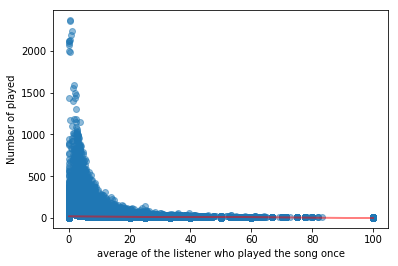

In [22]:
# plot training data, overlay with fit
plt.plot(trainxonce,trainyonce,'o', alpha = 0.5)
plt.plot(testxonce, y_predonce, 'r', alpha = 0.5)
plt.xlabel('average of the listener who played the song once')
plt.ylabel('Number of played')


Last but not least, we can plot the residual to get a visual plot of the residual linear regression model.

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


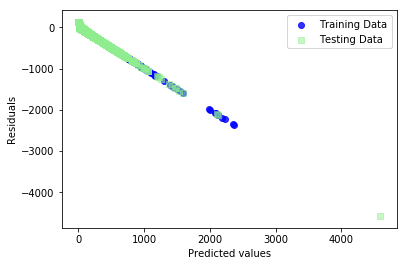

In [77]:
plt.scatter(trainyonce, (regr.predict(trainxonce)-trainyonce), c='blue', marker='o', label='Training Data', alpha = 0.8)
plt.scatter(testyonce, (regr.predict(testxonce)-testyonce), c='lightgreen', marker='s', label='Testing Data', alpha = 0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upperleft')
#plt.hlines(y=0, xmin=-10, xmax=60, lw=2, color='red')
plt.show()

### Logistic Regression

The following code will create a model of logistic regression and do a prediction for the model.

In [27]:
# assign the logistic regression to the below variable
log_reg4 = LogisticRegression()

# training the model
log_reg4.fit(xonce, yonce)
#testxmale = testxfifth.astype('int')

#predict the model
y_predL4 = log_reg4.predict(testxonce)
y_predL4


Print the confusion matrix, accuracy score, and the classification report.

In [28]:
print("EVALUATION ON TESTING DATA")
print("Confusion Matrix:")
print(confusion_matrix(testyonce, y_predL4))
print("Accuracy Score:")
print(accuracy_score(y_predL4, testyonce))
print("Classification Report:")
print(classification_report(y_predL4, testyonce))

## Listener who played a certain song at least 5 times responsed by variable number of played by number

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for the listener who played it at least 5 times based on the total number the song has been played for as response variable.

In [46]:
xfive = df[['Played Five']]
yfive = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxfive, testxfive, trainyfive, testyfive) = train_test_split(xfive, yfive, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyfive)))
print("testing data points: {}".format(len(testyfive)))

training data points: 341016
testing data points: 113672


Then, we can apply the linear regression to get a model and do the prediction.

In [47]:
# train regression model
regrfive = LinearRegression(fit_intercept=True)
regrfive.fit(trainxfive, trainyfive)
y_predfive = regrfive.predict(testxfive)

Next we can apply the K-Fold cross vaidation and count the accuracy. In this case, we apply the K-Fold for 10 folds using the value from linear model as the estimator.

In [48]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesfive = cross_val_score(estimator = regrfive, X = trainxfive, y = trainyfive, cv = 10)
accuraciesfive

Mean of the accuracy 0.7620352040590175
Std Deviation of the accuracy 0.047334205662490664


array([0.7769722 , 0.76742585, 0.74584634, 0.82307082, 0.7445333 ,
       0.65468232, 0.75347225, 0.83911889, 0.76945603, 0.74577402])

The number of accuracy in all of the 10 folds is more than 70 with one fold that is less than 70. Lets take a look at the mean and the standard deviation to know the overall performance of models to get a much better idea of our model performance.

In [49]:
print "Mean of the accuracy", accuraciesfive.mean()
print "Std Deviation of the accuracy", accuraciesfive.std()

Mean of the accuracy 0.7620352040590175
Std Deviation of the accuracy 0.047334205662490664


We can see that the mean of our models is more than 70 percent of all the 10 models evaluation. The standard deviation to know the variance of the data whether it is low or high. In this case we have a variance of less than 1 percent this means that our model has low variances. Another way tp evaluate ou model is by using the R-Square and mean square error. The more the value approaching 1 the better the model it will be.

In [65]:
# Best possible score is 1.0, lower values are worse.
print ('Training Score:', regr.score(trainxfive, trainyfive))
print ('Testing Score:', regr.score(testxfive, testyfive))
print ('Training MSE: ', np.mean((regr.predict(trainxfive) - trainyfive)**2))
print ('Testing MSE: ', np.mean((regr.predict(testxfive) - testyfive)**2))


('Training Score:', 0.04438832931615477)
('Testing Score:', 0.05268611697559944)
('Training MSE: ', Number of Played    1368.424898
dtype: float64)
('Testing MSE: ', Number of Played    1635.506005
dtype: float64)


As we can see above, the value of R-Square is small for both training and testing datasets. When the value of R-Square of a model is more than 0.70, it can be considered a good model. Since it is less than 70 percent, then this model is not a good model.

Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

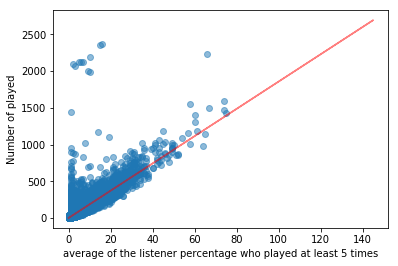

In [64]:
# plot training data, overlay with fit
plt.plot(trainxfive,trainyfive,'o', alpha = 0.5)
plt.plot(testxfive, y_predfive, 'r', alpha = 0.5)
plt.xlabel('average of the listener percentage who played at least 5 times')
plt.ylabel('Number of played')


Last but not least, we can plot the residual to get a visual plot of the residual linear regression model.

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


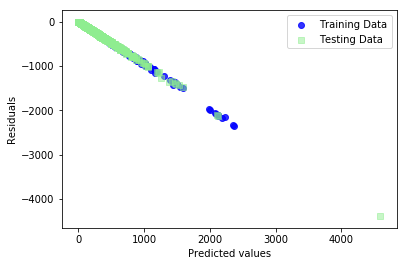

In [75]:
plt.scatter(trainyfive, (regr.predict(trainxfive)-trainyfive), c='blue', marker='o', label='Training Data', alpha = 0.8)
plt.scatter(testyfive, (regr.predict(testxfive)-testyfive), c='lightgreen', marker='s', label='Testing Data', alpha = 0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upperleft')
#plt.hlines(y=0, xmin=-10, xmax=60, lw=2, color='red')
plt.show()

### Logistic Regression

The following code will create a model of logistic regression and do a prediction for the model.

In [29]:
# assign the logistic regression to the below variable
log_reg5 = LogisticRegression()

# training the model
log_reg5.fit(xfive, yfive)
#testxmale = testxfifth.astype('int')

#predict the model
y_predL5 = log_reg5.predict(testxfive)
y_predL5


Print the confusion matrix, accuracy score, and the classification report.

In [30]:
print("EVALUATION ON TESTING DATA")
print("Confusion Matrix:")
print(confusion_matrix(testyfive, y_predL5))
print("Accuracy Score:")
print(accuracy_score(y_predL5, testyfive))
print("Classification Report:")
print(classification_report(y_predL5, testyfive))

## Listener who played a certain song at least 5 times responsed by variable number of played by percentage

In here, we are going to do linear regressing based using K-Fold cross validation. We are going to split our data into 75 percent for training and 25 percent for testing.

Add the packages to do linear regression. Select the variables that we are going to train and test. In here we are going to get the model for the percentage listener who played it at least 5 times based on the total number the song has been played for as response variable.

In [50]:
xfifth = df[['Fifth Percentage']]
yfifth = df[['Number of Played']]

# split data set
#construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainxfifth, testxfifth, trainyfifth, testyfifth) = train_test_split(xfifth, yfifth, test_size=0.25, random_state=50)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainyfifth)))
print("testing data points: {}".format(len(testyfifth)))

training data points: 341016
testing data points: 113672


Then, we can apply the linear regression to get a model and do the prediction.

In [51]:
# train regression model
regrfifth = LinearRegression(fit_intercept=True)
regrfifth.fit(trainxfifth, trainyfifth)
y_predfifth = regrfifth.predict(testxfifth)

Next we can apply the K-Fold cross vaidation and count the accuracy. In this case, we apply the K-Fold for 10 folds using the value from linear model as the estimator.


In [52]:
#apply K-Fold to our training set, we are using 10 fold
accuraciesfifth = cross_val_score(estimator = regrfifth, X = trainxfifth, y = trainyfifth, cv = 10)
accuraciesfifth

array([0.01600951, 0.01553838, 0.01939069, 0.02370651, 0.01896559,
       0.01568692, 0.01742793, 0.01979416, 0.01825114, 0.01755738])

The number of accuracy in all of the 10 folds is so small. Lets take a look at the mean and the standard deviation to know the overall performance of models to get a much better idea of our model performance.

In [53]:
print "Mean of the accuracy", accuraciesfifth.mean()
print "Std Deviation of the accuracy", accuraciesfifth.std()

Mean of the accuracy 0.018232819895359208
Std Deviation of the accuracy 0.002325203555722994


We can see that the mean of our models is so small of all the 10 models evaluation. The standard deviation to know the variance of the data whether it is low or high. In this case we have a variance of less than 1 percent this means that our model has low variances. Another way tp evaluate ou model is by using the R-Square and mean square error. The more the value approaching 1 the better the model it will be.

In [69]:
# Best possible score is 1.0, lower values are worse.
print ('Training Score:', regr.score(trainxfifth, trainyfifth))
print ('Testing Score:', regr.score(testxfifth, testyfifth))
print ('Training MSE: ', np.mean((regr.predict(trainxfifth) - trainyfifth)**2))
print ('Testing MSE: ', np.mean((regr.predict(testxfifth) - testyfifth)**2))


('Training Score:', -0.011997320160443081)
('Testing Score:', -0.011515199924140518)
('Training MSE: ', Number of Played    1449.168498
dtype: float64)
('Testing MSE: ', Number of Played    1746.347449
dtype: float64)


As we can see above, the value of R-Square is negative for both training and testing datasets. When the value of R-Square of a model is more than 0.70, it can be considered a good model. Since it is less than 70 percent, then this model is not a good model.

Next, we can plot the data to get a visual graphic.

Text(0,0.5,'Number of played')

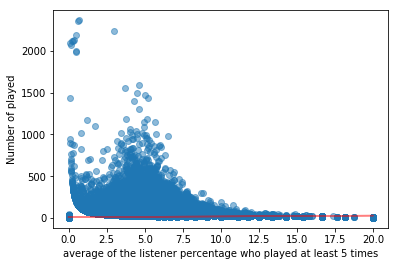

In [28]:
# plot training data, overlay with fit
plt.plot(trainxfifth,trainyfifth,'o', alpha = 0.5)
plt.plot(testxfifth, y_predfifth, 'r', alpha = 0.5)
plt.xlabel('average of the listener percentage who played at least 5 times')
plt.ylabel('Number of played')


Last but not least, we can plot the residual to get a visual plot of the residual linear regression model.

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


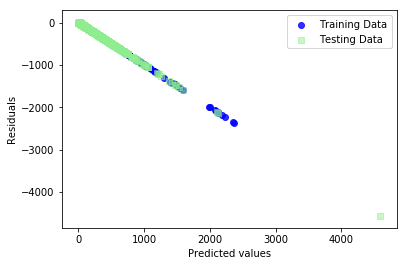

In [76]:
plt.scatter(trainyfifth, (regr.predict(trainxfifth)-trainyfifth), c='blue', marker='o', label='Training Data', alpha = 0.8)
plt.scatter(testyfifth, (regr.predict(testxfifth)-testyfifth), c='lightgreen', marker='s', label='Testing Data', alpha = 0.5)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upperleft')
#plt.hlines(y=0, xmin=-10, xmax=60, lw=2, color='red')
plt.show()

### Logistic Regression

The following code will create a model of logistic regression and do a prediction for the model.

In [31]:
# assign the logistic regression to the below variable
log_reg6 = LogisticRegression()

# training the model
log_reg6.fit(xfifth, yfifth)
#testxmale = testxfifth.astype('int')

#predict the model
y_predL6 = log_reg6.predict(testxfifth)
y_predL6


Print the confusion matrix, accuracy score, and the classification report.

In [32]:
print("EVALUATION ON TESTING DATA")
print("Confusion Matrix:")
print(confusion_matrix(testyfifth, y_predL6))
print("Accuracy Score:")
print(accuracy_score(y_predL6, testyfifth))
print("Classification Report:")
print(classification_report(y_predL6, testyfifth))